<a href="https://colab.research.google.com/github/rishidholkheria/TimeSeriesForecasting/blob/master/TimeSeriesForecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install prophet
import plotly.graph_objects as go
!pip install plotly
!pip install pandas

In [ ]:
import warnings;
warnings.simplefilter('ignore')

In [ ]:
import pandas as pd
from prophet import Prophet

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving dataset.csv to dataset (6).csv


In [ ]:
df = pd.read_csv('dataset.csv')

In [ ]:
df.head()

,Time Date,Product,Store,Value
0,1012018,2667437,QLD_CW_ST0203,2926.000
1,2012018,2667437,QLD_CW_ST0203,2687.531
2,3012018,2667437,QLD_CW_ST0203,2793.000
3,4012018,2667437,QLD_CW_ST0203,2394.000
4,5012018,2667437,QLD_CW_ST0203,2660.000


In [ ]:
df.describe()

,Time Date,Product,Value
count,1.080000e+03,1080.0,1080.000000
mean,1.567207e+07,2667437.0,4048.117478
std,8.791548e+06,0.0,1439.945783
min,1.012018e+06,2667437.0,2042.813500
25%,8.069518e+06,2667437.0,2632.498599
50%,1.556702e+07,2667437.0,4256.000000
75%,2.308452e+07,2667437.0,5288.248910
max,3.112202e+07,2667437.0,8147.739600


In [ ]:
print(df['Product'].unique())
print(df['Store'].unique())

[2667437]
['QLD_CW_ST0203']


In [ ]:
df.dtypes

,0
Time Date,int64
Product,int64
Store,object
Value,float64


In [ ]:
df['Year'] = df['Time Date'].apply(lambda x: str(x)[-4:])
df['Month'] = df['Time Date'].apply(lambda x: str(x)[-6:-4])
df['Day'] = df['Time Date'].apply(lambda x: str(x)[:-6])
df['ds'] = pd.DatetimeIndex(df['Year']+'-'+df['Month']+'-'+df['Day'])

In [ ]:
df.dtypes

,0
Time Date,int64
Product,int64
Store,object
Value,float64
Year,object
Month,object
Day,object
ds,datetime64[ns]


In [ ]:
df.head()

,Time Date,Product,Store,Value,Year,Month,Day,ds
0,1012018,2667437,QLD_CW_ST0203,2926.000,2018,01,1,2018-01-01
1,2012018,2667437,QLD_CW_ST0203,2687.531,2018,01,2,2018-01-02
2,3012018,2667437,QLD_CW_ST0203,2793.000,2018,01,3,2018-01-03
3,4012018,2667437,QLD_CW_ST0203,2394.000,2018,01,4,2018-01-04
4,5012018,2667437,QLD_CW_ST0203,2660.000,2018,01,5,2018-01-05


In [ ]:
df_updated=df.copy()

In [ ]:
df_updated.drop(['Time Date', 'Product', 'Store', 'Year', 'Month', 'Day'], axis=1, inplace=True)
# df_updated.columns = ['ds', 'y']

In [ ]:
df_updated.columns

Index(['Value', 'ds'], dtype='object')

In [ ]:
df_updated.dtypes

,0
Value,float64
ds,datetime64[ns]


In [ ]:
df_updated.rename(columns={'Value':'y'}, inplace=True )

In [ ]:
df_updated.head()

,y,ds
0,2926.000,2018-01-01
1,2687.531,2018-01-02
2,2793.000,2018-01-03
3,2394.000,2018-01-04
4,2660.000,2018-01-05


In [ ]:
df_updated=df_updated[['ds','y']]

In [ ]:
df_updated.isnull().sum()

,0
ds,0
y,0


In [ ]:
df_updated.describe()

,ds,y
count,1080,1080.000000
mean,2019-06-24 18:28:00,4048.117478
min,2018-01-01 00:00:00,2042.813500
25%,2018-09-27 18:00:00,2632.498599
50%,2019-06-24 12:00:00,4256.000000
75%,2020-03-21 06:00:00,5288.248910
max,2020-12-16 00:00:00,8147.739600
std,NaN,1439.945783


In [ ]:
df_updated.dtypes

,0
ds,datetime64[ns]
y,float64


In [ ]:
df_updated

,ds,y
0,2018-01-01,2926.000000
1,2018-01-02,2687.531000
2,2018-01-03,2793.000000
3,2018-01-04,2394.000000
4,2018-01-05,2660.000000
...,...,...
1075,2020-12-12,3167.594500
1076,2020-12-13,3167.594500
1077,2020-12-14,3383.354511
1078,2020-12-15,2714.591329


In [ ]:
m = Prophet(interval_width=0.95, daily_seasonality=True)
model = m.fit(df_updated)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpsaa8vc_c/dz97tis2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsaa8vc_c/o1005pdd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=77748', 'data', 'file=/tmp/tmpsaa8vc_c/dz97tis2.json', 'init=/tmp/tmpsaa8vc_c/o1005pdd.json', 'output', 'file=/tmp/tmpsaa8vc_c/prophet_modelbh638n0g/prophet_model-20250610105254.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:52:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:52:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future = m.make_future_dataframe(periods=500, freq='D')   #periods=Number of prediction D='Daily Frequency
forecast = m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-01-01,3041.771182,800.249800,4038.427429,3041.771182,3041.771182,-640.520201,-640.520201,-640.520201,468.866564,...,16.599243,16.599243,16.599243,-1125.986008,-1125.986008,-1125.986008,0.0,0.0,0.0,2401.250981
1,2018-01-02,3042.521656,750.124305,4032.768112,3042.521656,3042.521656,-650.771051,-650.771051,-650.771051,468.866564,...,-11.296388,-11.296388,-11.296388,-1108.341227,-1108.341227,-1108.341227,0.0,0.0,0.0,2391.750605
2,2018-01-03,3043.272131,800.851624,3996.031165,3043.272131,3043.272131,-625.066377,-625.066377,-625.066377,468.866564,...,-4.417865,-4.417865,-4.417865,-1089.515076,-1089.515076,-1089.515076,0.0,0.0,0.0,2418.205755
3,2018-01-04,3044.022606,846.247788,4086.437744,3044.022606,3044.022606,-578.237548,-578.237548,-578.237548,468.866564,...,22.477984,22.477984,22.477984,-1069.582096,-1069.582096,-1069.582096,0.0,0.0,0.0,2465.785058
4,2018-01-05,3044.773081,898.477221,3990.826903,3044.773081,3044.773081,-614.374860,-614.374860,-614.374860,468.866564,...,-34.571885,-34.571885,-34.571885,-1048.669539,-1048.669539,-1048.669539,0.0,0.0,0.0,2430.398221


In [ ]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1575,2022-04-26,4665.800840,2960.465453,6220.628821,4626.850579,4702.968478,-97.518695,-97.518695,-97.518695,468.866564,...,-11.296388,-11.296388,-11.296388,-555.088871,-555.088871,-555.088871,0.0,0.0,0.0,4568.282145
1576,2022-04-27,4666.872839,3136.723015,6306.125684,4627.795146,4704.109903,43.237380,43.237380,43.237380,468.866564,...,-4.417865,-4.417865,-4.417865,-421.211319,-421.211319,-421.211319,0.0,0.0,0.0,4710.110219
1577,2022-04-28,4667.944839,3364.967207,6479.922794,4628.739713,4705.251328,209.060057,209.060057,209.060057,468.866564,...,22.477984,22.477984,22.477984,-282.284491,-282.284491,-282.284491,0.0,0.0,0.0,4877.004895
1578,2022-04-29,4669.016838,3326.420030,6446.622290,4629.684281,4706.392753,294.459575,294.459575,294.459575,468.866564,...,-34.571885,-34.571885,-34.571885,-139.835104,-139.835104,-139.835104,0.0,0.0,0.0,4963.476413
1579,2022-04-30,4670.088837,3552.822413,6555.846863,4630.628848,4707.532196,459.411897,459.411897,459.411897,468.866564,...,-13.999168,-13.999168,-13.999168,4.544501,4.544501,4.544501,0.0,0.0,0.0,5129.500734


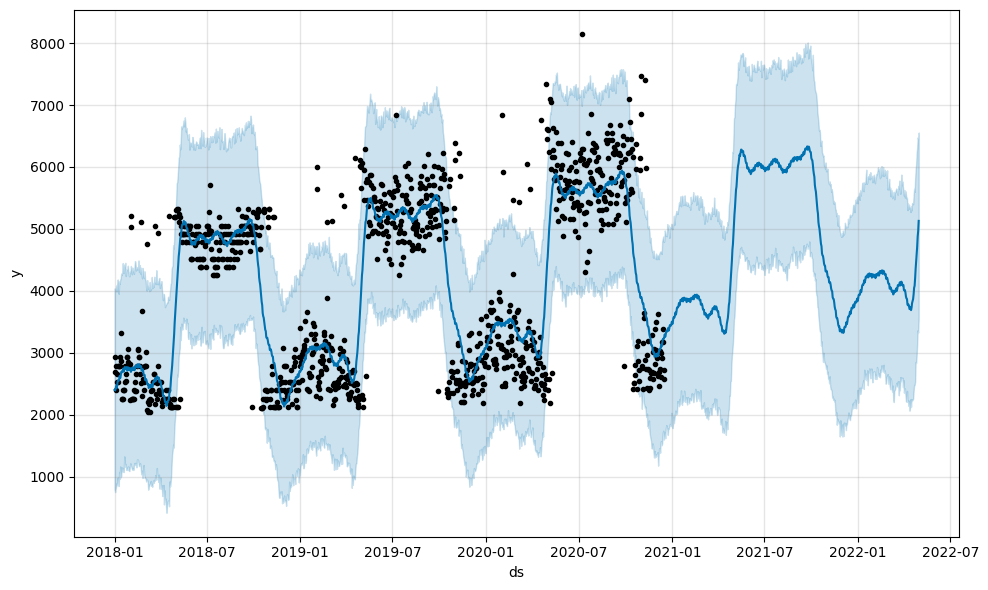

In [ ]:
  plot1 = m.plot(forecast)

In [ ]:
print(forecast.trend)

0       3041.771182
1       3042.521656
2       3043.272131
3       3044.022606
4       3044.773081
           ...     
1575    4665.800840
1576    4666.872839
1577    4667.944839
1578    4669.016838
1579    4670.088837
Name: trend, Length: 1580, dtype: float64


In [ ]:
fig = go.Figure()


fig.add_trace(go.Scatter(
    x=forecast['ds'],
    y=forecast['yhat'],
    mode='lines',
    name='Forecast (yhat)',
    line=dict(color='blue')
))

# Confidence interval (shaded area)
fig.add_trace(go.Scatter(
    x=forecast['ds'].tolist() + forecast['ds'][::-1].tolist(),
    y=forecast['yhat_upper'].tolist() + forecast['yhat_lower'][::-1].tolist(),
    fill='toself',
    fillcolor='rgba(173,216,230,0.3)',  # Light blue
    line=dict(color='rgba(255,255,255,0)'),
    hoverinfo="skip",
    name='95% Confidence Interval'
))

fig.update_layout(
    title='Forecast with 95% Confidence Interval',
    xaxis_title='Date',
    yaxis_title='Value',
    template='plotly_white'
)

fig.show()